In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_excel(r"card.xls")
# Print shape of dataset
print(df.shape)

(30000, 24)


In [6]:
# Check Missing Values
na_features= [feature for feature in df.columns if df[feature].isnull().sum() > 0 ]
na_features

[]

In [9]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)


In [10]:
print(df.shape)

(29965, 24)


In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 24


In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 10


In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 14


In [15]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
#Split X and Y
#Split Dataframe to X and y
#Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “default payment next month” column.

In [29]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

In [30]:
## Feature Transformation

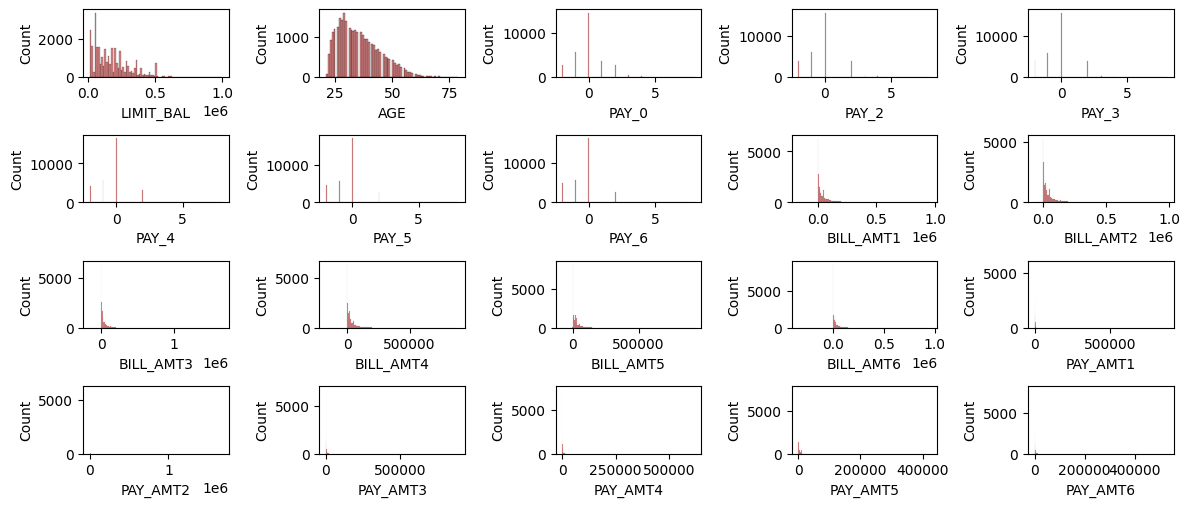

In [31]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']):
    plt.subplot(5, 5, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [32]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

LIMIT_BAL     0.993491
AGE           0.732056
BILL_AMT1     2.662513
BILL_AMT2     2.703862
BILL_AMT3     3.086494
BILL_AMT4     2.820545
BILL_AMT5     2.874925
BILL_AMT6     2.845137
PAY_AMT1     14.661595
PAY_AMT2     30.438613
PAY_AMT3     17.208177
PAY_AMT4     12.898506
PAY_AMT5     11.121742
PAY_AMT6     10.635094
dtype: float64

In [33]:
#Apply Power Transformer to Check if it can reduces the outliers

In [34]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X_copy = pt.fit_transform(X[transform_features])

In [35]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

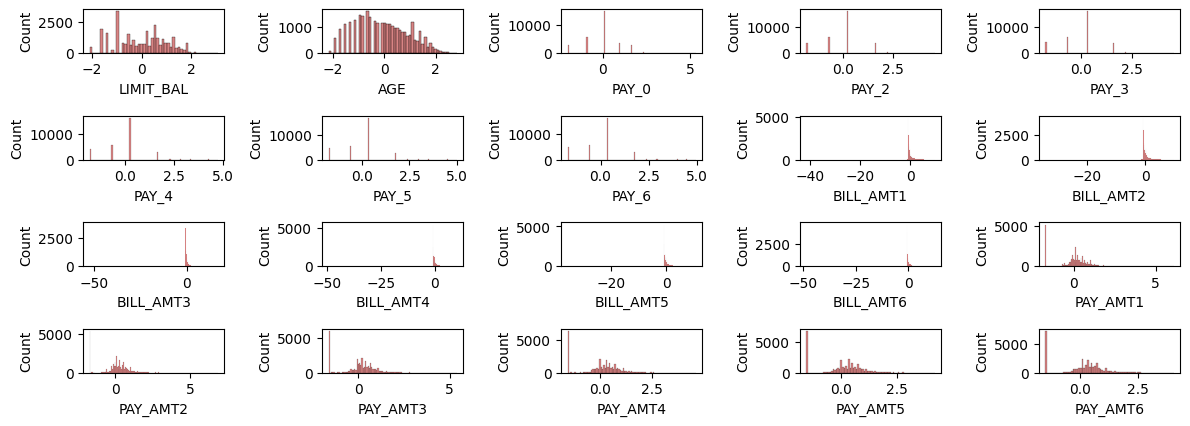

In [36]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(5, 5, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [37]:
X_copy.skew(axis=0, skipna=True)

LIMIT_BAL   -0.075331
AGE          0.035068
PAY_0        0.030013
PAY_2       -0.013766
PAY_3       -0.000944
PAY_4        0.012348
PAY_5        0.023655
PAY_6        0.031393
BILL_AMT1   -2.422307
BILL_AMT2   -1.292917
BILL_AMT3   -3.208001
BILL_AMT4   -2.797464
BILL_AMT5   -1.307748
BILL_AMT6   -3.003499
PAY_AMT1    -0.131200
PAY_AMT2    -0.111103
PAY_AMT3    -0.150652
PAY_AMT4    -0.164781
PAY_AMT5    -0.178101
PAY_AMT6    -0.174371
dtype: float64

In [47]:
num_features1=num_features[:-1]

In [48]:

transform_columns = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features1)
    ]
)

In [49]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [50]:
X = preprocessor.fit_transform(X)

In [51]:
X

array([[-1.66497736, -1.50554968,  1.66254708, ..., -0.30825283,
        -0.31433077, -0.29356226],
       [-0.08974493, -1.13429799, -0.89022775, ..., -0.24445373,
        -0.31433077, -0.18111857],
       [-0.39605001,  0.01572238,  0.10019955, ..., -0.24445373,
        -0.24891194, -0.01245303],
       ...,
       [-1.3714013 ,  0.34962652,  2.98057826, ..., -0.04029662,
        -0.1834931 , -0.11927454],
       [-0.51482575,  0.73760186,  0.9287817 , ..., -0.18537577,
         3.15051247, -0.19213805],
       [-0.95329074,  1.15070839,  0.10019955, ..., -0.24445373,
        -0.24891194, -0.23734041]])

In [52]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [55]:
import pandas as pd

# Convert y to a DataFrame for easy plotting
y_df = pd.DataFrame(y, columns=['default payment next month'])

# Get class distribution before resampling
distribution_before = y_df['default payment next month'].value_counts(normalize=True)
print("Distribution before resampling:")
print(distribution_before)


Distribution before resampling:
default payment next month
0    0.778742
1    0.221258
Name: proportion, dtype: float64


In [56]:
# Convert y_res to a DataFrame for easy plotting
y_res_df = pd.DataFrame(y_res, columns=['default payment next month'])

# Get class distribution after resampling
distribution_after = y_res_df['default payment next month'].value_counts(normalize=True)
print("Distribution after resampling:")
print(distribution_after)


Distribution after resampling:
default payment next month
1    0.613953
0    0.386047
Name: proportion, dtype: float64


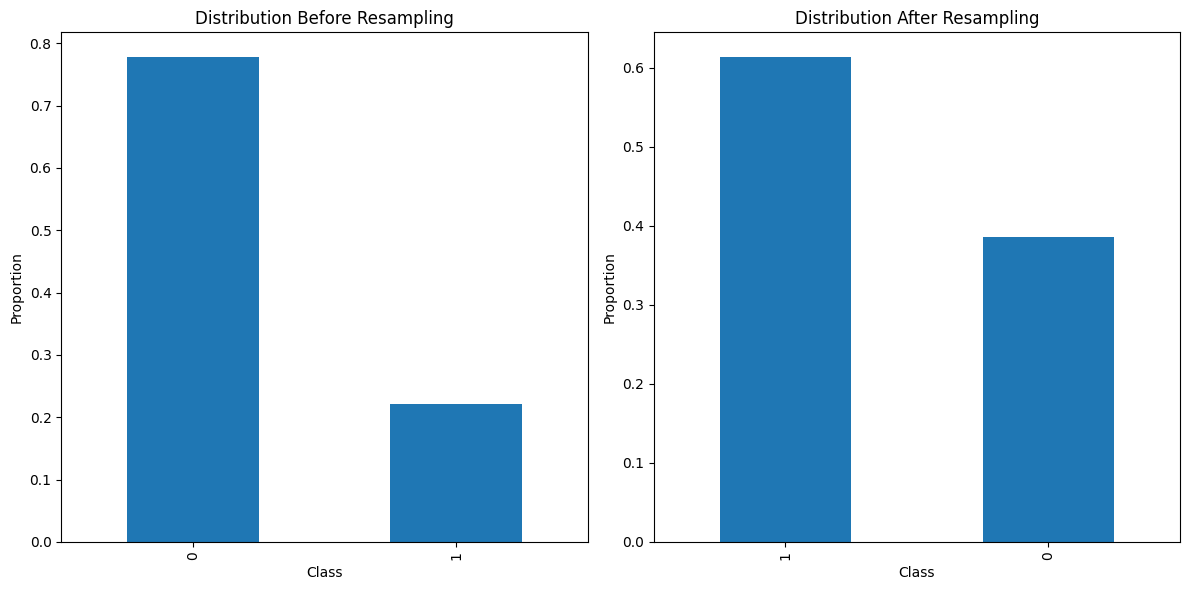

In [57]:
import matplotlib.pyplot as plt

# Plot distribution before resampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
distribution_before.plot(kind='bar')
plt.title('Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Proportion')

# Plot distribution after resampling
plt.subplot(1, 2, 2)
distribution_after.plot(kind='bar')
plt.title('Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()



SMOTEENN is a combination of two techniques: SMOTE (Synthetic Minority Oversampling Technique) and ENN (Edited Nearest Neighbors). 

Here's how it works:

1. SMOTE (Synthetic Minority Oversampling Technique):
What it does: SMOTE generates new synthetic examples for the minority class by interpolating between existing minority samples. It takes the minority class points and creates new ones by choosing a point between an existing sample and one of its nearest neighbors.

Why: The goal is to increase the number of minority class samples so that the model can learn better from balanced data.

Example:

Imagine you have 3 minority class samples: [2, 3], [3, 4], and [4, 5].
SMOTE might create a new synthetic sample like [3.5, 4.5] by choosing a point between [3, 4] and [4, 5].

2. ENN (Edited Nearest Neighbors):
What it does: After SMOTE generates synthetic samples, ENN cleans up the data by removing noisy or ambiguous points. It looks at each sample in the dataset and checks its nearest neighbors. If a sample is surrounded by neighbors from the opposite class, it’s considered "noisy" or "misclassified" and is removed.

Why: This step helps in removing overlapping points or outliers between classes, which can lead to better separation between the majority and minority classes.

Example:

Let's say a new sample generated by SMOTE is [3.5, 4.5].
If most of its nearest neighbors are from the majority class (class 0), ENN may remove this sample, considering it to be noisy.
In Your Case:
Before Resampling: You have about 77.9% of class 0 (majority) and 22.1% of class 1 (minority).

SMOTE:

SMOTE creates new synthetic samples for class 1 (minority) to increase its representation.
ENN:

ENN then examines the dataset and removes any class 0 (majority) points that are "too close" to the newly generated synthetic points from class 1. This helps clean up noisy majority class points.

Final Distribution:
After resampling, the class distribution changed to around 61.4% for class 1 and 38.6% for class 0. This shows that SMOTE added minority class samples, and ENN removed some majority class samples to balance the dataset.

Why SMOTEENN?
SMOTE helps to increase minority samples, while ENN helps to clean noisy or borderline samples from the majority class, leading to better model performance on imbalanced datasets.


Interpolating means creating new data points between existing ones by estimating their values based on known data. In the context of SMOTE, interpolation refers to generating new synthetic samples by taking an existing minority class point and creating a point between it and one of its nearest neighbors.

Example:
Suppose you have two data points:

Point A: [2, 3]
Point B: [4, 5]
Interpolation would create a new point, say halfway between these two points, like:

New Point: [(2+4)/2, (3+5)/2] = [3, 4]
So, the new point [3, 4] is generated between the existing points [2, 3] and [4, 5].

In [58]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((24884, 43), (6221, 43))

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [60]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [61]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier()

}

In [62]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [63]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9355
- F1 score: 0.9472
- Precision: 0.9523
- Recall: 0.9421
- Roc Auc Score: 0.9336


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8717
- F1 score: 0.8969
- Precision: 0.8846
- Recall: 0.9096
- Roc Auc Score: 0.8606


Logistic Regression
Model performance for Training set
- Accuracy: 0.7780
- F1 score: 0.8145
- Precision: 0.8366
- Recall: 0.7935
- Roc Auc Score: 0.7734
----------------------------------
Model performance for Test set
- Accuracy: 0.7856
- F1 score: 0.8220
- Precision: 0.8374
- Recall: 0.8071
- Roc Auc Score: 0.7792


XGBClassifier
Model performance for Training set


In [64]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.935541
3,XGBClassifier,0.925735
1,Decision Tree,0.871725
2,Logistic Regression,0.785565


In [65]:
base_model_report_without_smote =evaluate_models(X=X, y=y, models=models)
base_model_report_without_smote

Random Forest
Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.9982
- Precision: 0.9987
- Recall: 0.9977
- Roc Auc Score: 0.9987
----------------------------------
Model performance for Test set
- Accuracy: 0.8141
- F1 score: 0.4545
- Precision: 0.6427
- Recall: 0.3515
- Roc Auc Score: 0.6482


Decision Tree
Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.9983
- Precision: 1.0000
- Recall: 0.9966
- Roc Auc Score: 0.9983
----------------------------------
Model performance for Test set
- Accuracy: 0.7297
- F1 score: 0.3919
- Precision: 0.3884
- Recall: 0.3955
- Roc Auc Score: 0.6098


Logistic Regression
Model performance for Training set
- Accuracy: 0.8170
- F1 score: 0.4248
- Precision: 0.6992
- Recall: 0.3051
- Roc Auc Score: 0.6339
----------------------------------
Model performance for Test set
- Accuracy: 0.8119
- F1 score: 0.3931
- Precision: 0.6797
- Recall: 0.2765
- Roc Auc Score: 0.6199


XGBClassifier
Model performance for Training set


,Model Name,Accuracy
3,XGBClassifier,0.814617
0,Random Forest,0.814116
2,Logistic Regression,0.811947
1,Decision Tree,0.729685


In [71]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

dt_params = {
    'max_depth': [10, 20, 30],         # Reduced depth options
    'min_samples_split': [2, 5],       # Fewer split options
    'min_samples_leaf': [1, 2],        # Fewer leaf options
    'criterion': ['gini'],             # Removed entropy to simplify
}

In [72]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("DT", DecisionTreeClassifier(), dt_params)
]

In [74]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=5,
                                   cv=2,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for DT -------------------
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'gini'}


In [75]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None},
 'DT': {'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': 30,
  'criterion': 'gini'}}

In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "DT": DecisionTreeClassifier(**model_param['DT']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9325
- F1 score: 0.9447
- Precision: 0.9499
- Recall: 0.9395
- Roc Auc Score: 0.9304


DT
Model performance for Training set
- Accuracy: 0.9803
- F1 score: 0.9838
- Precision: 0.9965
- Recall: 0.9713
- Roc Auc Score: 0.9830
----------------------------------
Model performance for Test set
- Accuracy: 0.8661
- F1 score: 0.8907
- Precision: 0.8922
- Recall: 0.8892
- Roc Auc Score: 0.8593


XGBClassifier
Model performance for Training set
- Accuracy: 0.9980
- F1 score: 0.9984
- Precision: 0.9991
- Recall: 0.9977
- Roc Auc Score: 0.9981
----------------------------------
Model performance for Test set
- Accuracy: 0.9341
- F1 score: 0.9454
- Precision: 0.9610
- Recall: 0.9303
- Roc Auc Score: 0.9352




In [77]:
tuned_report

,Model Name,Accuracy
2,XGBClassifier,0.934094
0,Random Forest Classifier,0.932487
1,DT,0.866099


In [79]:
best_model = XGBClassifier(**model_param['XGBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'XGB'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGB'
Accuracy Score value: 0.9341
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2405
           1       0.96      0.93      0.95      3816

    accuracy                           0.93      6221
   macro avg       0.93      0.94      0.93      6221
weighted avg       0.94      0.93      0.93      6221



Interpreting the Metrics:

Class 0 (No Default):
1. Precision: 89% of the predicted non-defaulters were correct.
2. Recall: 94% of the actual non-defaulters were correctly identified.
3. F1-Score: A balance between precision and recall, at 92%.

Class 1 (Default):
1. Precision: 96% of the predicted defaulters were correct.
2. Recall: 93% of the actual defaulters were correctly identified.
3. F1-Score: A strong balance, at 95%.

Overall, the model performs very well with high precision and recall, especially for the defaulters (Class 1). However, there’s a slight trade-off in precision for Class 0, meaning some non-defaulters were predicted incorrectly

F1 Score in Simple Terms:
F1 score is a single metric that combines two important things: precision and recall.

It gives a balance between these two, so you don't focus on just one and ignore the other.

What does balance between precision and recall mean?

Precision: Out of all the predictions the model made as "positive" (e.g., people predicted to default on a loan), how many were actually correct?

High precision means the model is very accurate when it says someone will default.
But if the model only predicts "default" in very obvious cases, it may miss some actual defaulters.

Recall: Out of all the people who actually defaulted, how many did the model correctly predict?
High recall means the model finds most of the defaulters.
But sometimes, to catch more defaulters, the model might also incorrectly predict some non-defaulters as defaulters.